# Домашнее задание №1. Дескриптивный анализ данных
Кадыров Т.И. ИУ6-22М

## Цель работы
Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

## Рассчет варианта

In [19]:
surname = "Кадыров"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  4
Задача № 1, шаг 11 - вариант:  2
задача № 2 - вариант:  4


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)
### 1.1 Загрузите данные в DataFrame

In [20]:
import pandas as pd

In [21]:
# Загружаем data frame, используем двойной заголовок, чтобы сохранить года
df = pd.read_excel('./data/wgidataset.xlsx', sheet_name='ControlofCorruption', header=[13,14])
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0      1996                              \
   Country/Territory               Code  Estimate    StdErr NumSrc       Rank   
0              Aruba                ABW       NaN       NaN    NaN        NaN   
1            Andorra                ADO  1.318143  0.480889    1.0  87.096771   
2        Afghanistan                AFG -1.291705  0.340507    2.0   4.301075   
3             Angola                AGO -1.167702  0.262077    4.0   9.677420   
4           Anguilla                AIA       NaN       NaN    NaN        NaN   

                             1998            ...   2021                        \
       Lower      Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
0        NaN        NaN       NaN       NaN  ...    2.0  78.571426  62.857143   
1  72.043015  96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
2   0.000000  27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
3   0.537634  27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
4        NaN        NaN       NaN       NaN  ...    1.0  73.333336  50.952381   

                  2022                                                    
       Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
0  89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  
1  96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
2  20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
3  40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
4  89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  

[5 rows x 146 columns]

In [22]:
# Объединяем год и название столбца и приводим все к одинарному заголовку
new_columns = [col[1] if col[1] in ['Country/Territory', 'Code'] else f"{col[0]}.{col[1]}" for col in df.columns]
df.columns = new_columns
df.head()

,Country/Territory,Code,1996.Estimate,1996.StdErr,1996.NumSrc,1996.Rank,1996.Lower,1996.Upper,1998.Estimate,1998.StdErr,...,2021.NumSrc,2021.Rank,2021.Lower,2021.Upper,2022.Estimate,2022.StdErr,2022.NumSrc,2022.Rank,2022.Lower,2022.Upper
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,78.571426,62.857143,89.047623,0.756785,0.317250,2.0,77.830185,60.849056,88.679245
1,Andorra,ADO,1.318143,0.480889,1.0,87.096771,72.043015,96.774193,1.334759,0.453149,...,1.0,88.571426,70.000000,96.666664,1.270204,0.463415,1.0,88.679245,68.396225,97.169815
2,Afghanistan,AFG,-1.291705,0.340507,2.0,4.301075,0.000000,27.419355,-1.176012,0.324013,...,8.0,12.380953,4.761905,20.952381,-1.183776,0.173320,8.0,12.264151,4.716981,20.283018
3,Angola,AGO,-1.167702,0.262077,4.0,9.677420,0.537634,27.419355,-1.180451,0.227055,...,10.0,29.047619,19.523809,40.476189,-0.601941,0.160003,10.0,30.660378,21.226416,43.396225
4,Anguilla,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,73.333336,50.952381,89.047623,1.270204,0.463415,1.0,88.679245,68.396225,97.169815


### 1.2 Отсортируйте данные по убыванию индекса DataFrame

In [23]:
df_desc = df.iloc[::-1]
df_desc.head()

,Country/Territory,Code,1996.Estimate,1996.StdErr,1996.NumSrc,1996.Rank,1996.Lower,1996.Upper,1998.Estimate,1998.StdErr,...,2021.NumSrc,2021.Rank,2021.Lower,2021.Upper,2022.Estimate,2022.StdErr,2022.NumSrc,2022.Rank,2022.Lower,2022.Upper
213,Zimbabwe,ZWE,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209


### 1.3 Отобразите данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика

In [24]:
import matplotlib.pyplot as plt

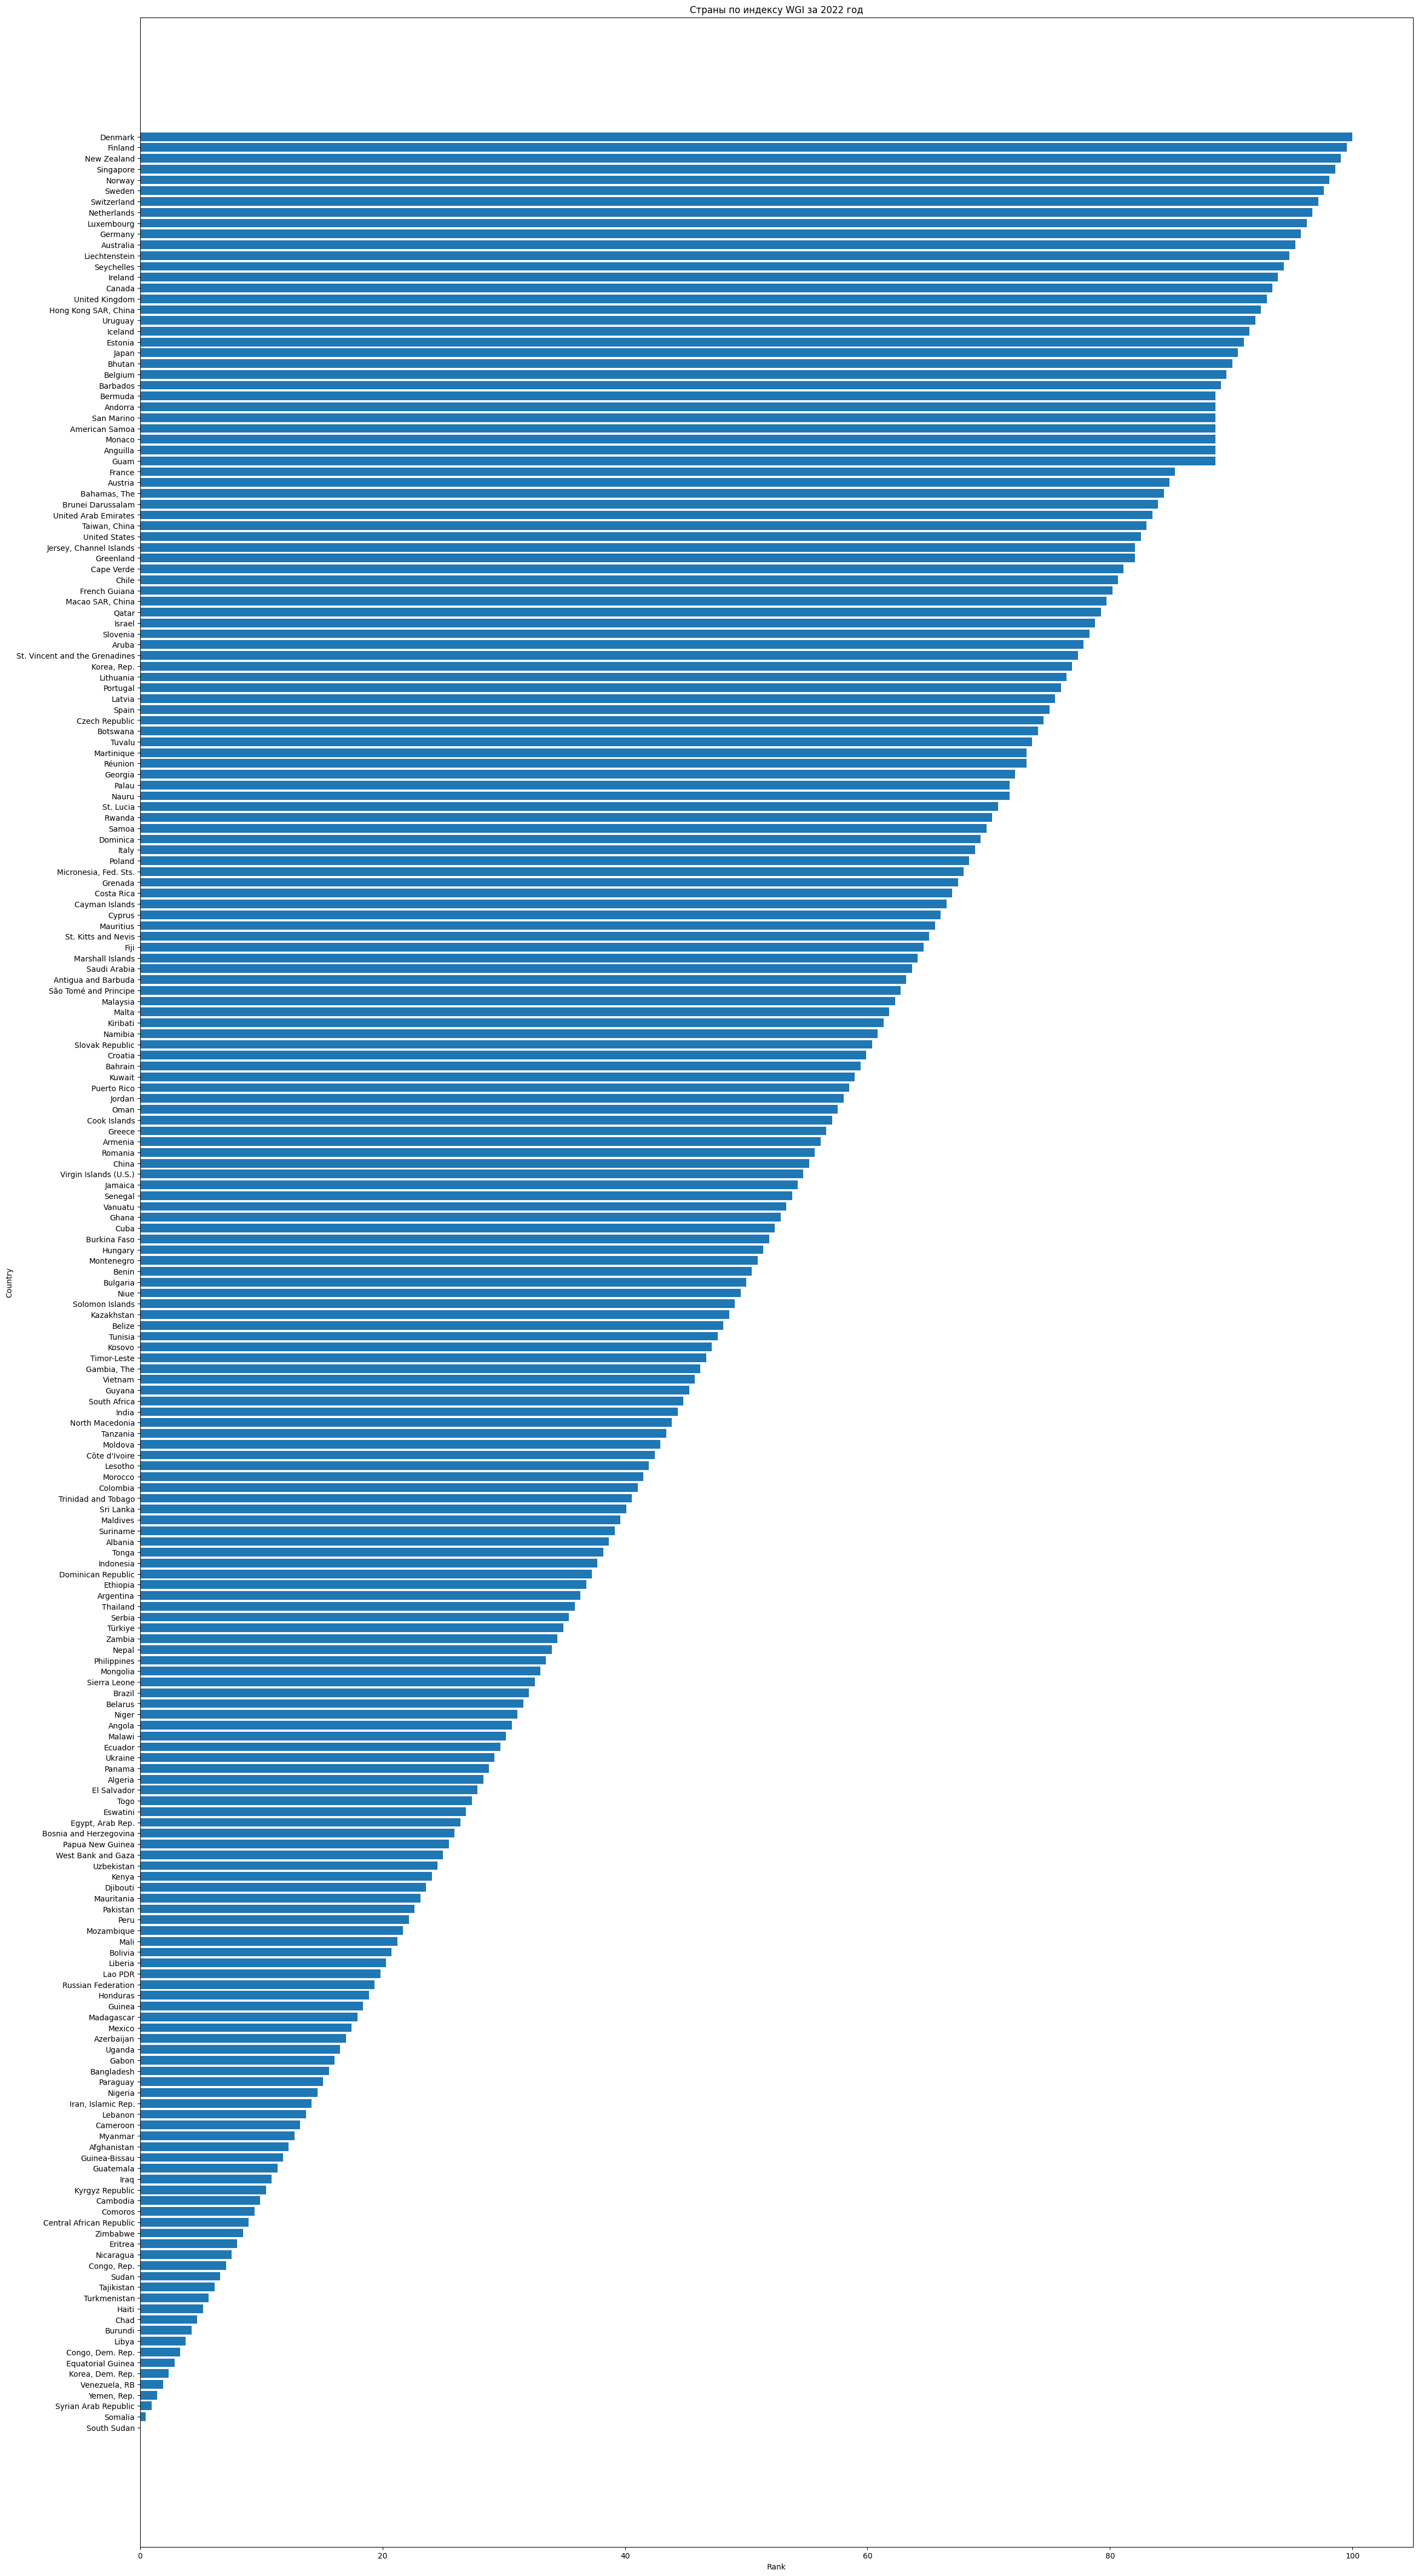

In [25]:
# Сортируем по полю 2022.Rank
df_sort = df.sort_values(by='2022.Rank')
# Удаляем те строки, у которых за этот год нет данных
df_sort_dropna = df_sort.dropna(subset=['2022.Rank'])
plt.figure(figsize=(30,60))
plt.barh(df_sort_dropna['Country/Territory'], df_sort_dropna['2022.Rank'])
plt.xlabel('Rank')
plt.ylabel('Country')
plt.title('Страны по индексу WGI за 2022 год')
plt.show()

### 1.4 Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом
Вариант 4. Middle East and North Africa (MENA)

In [26]:
# Исходный датасет
df_region = pd.read_excel('./data/regions.xlsx')
# Страны региона MENA
df_mena = df_region[df_region['Region'] == 'MENA']
# WGI индексы для стран MENA
df_wgi_mena = df.merge(df_mena, how='inner', left_on='Code', right_on='Code')
# Удаляем столбец Country/Territory. Выставляем индекс по Country
df_wgi_mena.set_index('Country', inplace=True)
df_wgi_mena.drop(columns='Country/Territory', inplace=True)

### 1.5 Выведите данные DataFrame'a

In [27]:
df_wgi_mena

,Code,1996.Estimate,1996.StdErr,1996.NumSrc,1996.Rank,1996.Lower,1996.Upper,1998.Estimate,1998.StdErr,1998.NumSrc,...,2021.Rank,2021.Lower,2021.Upper,2022.Estimate,2022.StdErr,2022.NumSrc,2022.Rank,2022.Lower,2022.Upper,Region
Country,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,ARE,-0.005579,0.312212,3.0,57.526882,35.483871,72.043015,0.033033,0.260451,3.0,...,83.333336,80.000000,89.047623,1.155336,0.162912,8.0,83.490562,79.716980,89.150940,MENA
Bahrain,BHR,0.328689,0.312212,3.0,63.978493,50.537636,77.419357,0.250789,0.260451,3.0,...,58.571430,49.523811,65.714287,0.139386,0.182716,7.0,59.433964,49.528301,66.037735,MENA
Algeria,DZA,-0.566741,0.262077,4.0,33.333332,16.666666,52.688171,-0.916649,0.227055,4.0,...,29.523809,19.047619,43.333332,-0.637930,0.176952,7.0,28.301888,19.811321,42.452831,MENA
Egypt,EGY,-0.472254,0.244907,5.0,38.709679,19.892473,53.763439,-0.477870,0.198134,5.0,...,26.666666,18.095238,36.666668,-0.678810,0.162612,9.0,26.415094,19.811321,38.207546,MENA
Iran,IRN,-0.480607,0.262077,4.0,37.634407,18.817204,54.301075,-0.460588,0.227055,4.0,...,13.809524,5.714286,21.904762,-1.126373,0.178425,6.0,14.150944,6.132075,21.698112,MENA
Iraq,IRQ,-1.602183,0.262077,4.0,0.537634,0.000000,9.139785,-1.422613,0.227055,4.0,...,8.571428,2.380952,19.047619,-1.212934,0.202626,6.0,10.849056,2.830189,20.754717,MENA
Israel,ISR,1.354008,0.210325,6.0,88.172043,81.182793,91.397850,1.148573,0.188628,6.0,...,80.000000,67.142860,83.809525,0.781039,0.196989,7.0,78.773582,66.509438,82.075470,MENA
Jordan,JOR,-0.035407,0.244907,5.0,55.376343,39.784946,65.053764,0.112762,0.198134,5.0,...,55.714287,48.095238,62.857143,0.073047,0.161482,9.0,58.018867,48.113209,63.207546,MENA
Kuwait,KWT,0.478682,0.262077,4.0,70.430107,59.139786,80.645164,0.562503,0.227055,4.0,...,51.904762,40.476189,61.428570,0.127031,0.182716,7.0,58.962265,49.528301,66.037735,MENA


### 1.6 Постройте графики индекса WGI за 1996-2022 для стран своего региона (estimate)

<Axes: title={'center': 'WGI 1996-2022'}>

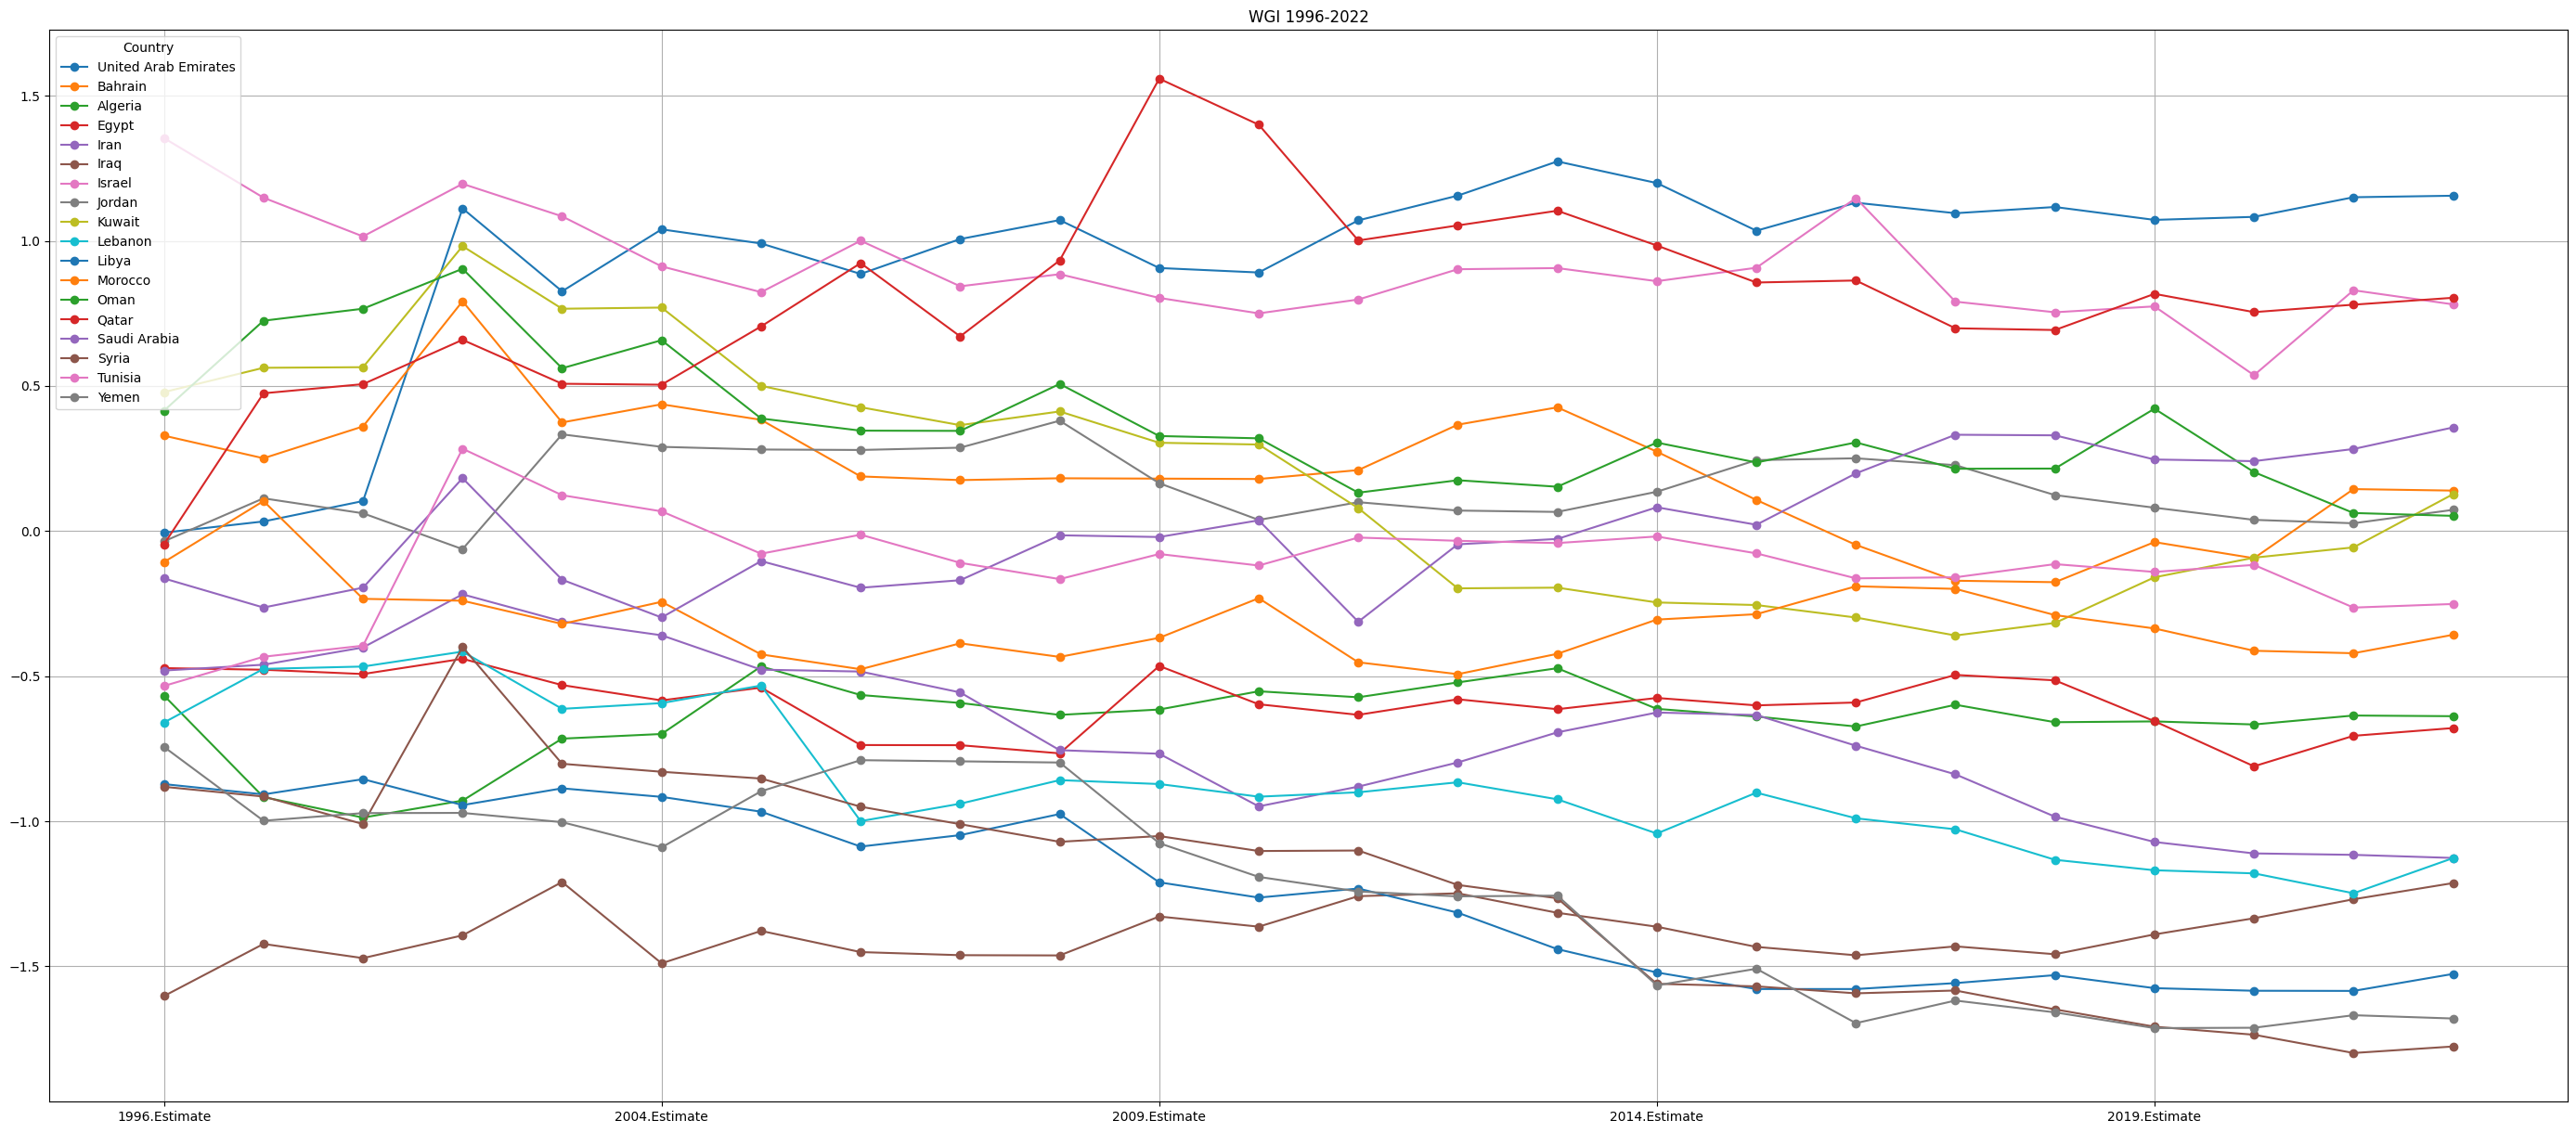

In [28]:
# Оставляем только столбцы Estimate и Country
df_plot_mena = df_wgi_mena.filter(regex='Estimate|Country')
# Транспонируем датафрейм и отрисовываем график на каждую страну
df_plot_mena.T.plot(figsize=(35,15), grid=True, marker='o', title='WGI 1996-2022')

### 1.7 Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2022 год

In [29]:
# Страна с минимальным значением
minWgi = df_wgi_mena['2022.Estimate'].idxmin()
minWgi

'Syria'

In [30]:
# Страна с максимальным значением
maxWgi = df_wgi_mena['2022.Estimate'].idxmax()
maxWgi

'United Arab Emirates'

### 1.8 Определите средние значения региона за каждый год в период с 1996 по 2022

In [31]:
# Оставляем только столбцы Estimate
df_wgi_mena_estimate = df_wgi_mena.filter(regex='Estimate')
# Считаем среднее по региону за каждый год
mean = df_wgi_mena_estimate.mean()
mean.name="mean"
mean

1996.Estimate   -0.255155
1998.Estimate   -0.214392
2000.Estimate   -0.227920
2002.Estimate    0.005365
2003.Estimate   -0.110138
2004.Estimate   -0.134619
2005.Estimate   -0.146972
2006.Estimate   -0.205434
2007.Estimate   -0.228394
2008.Estimate   -0.197921
2009.Estimate   -0.200338
2010.Estimate   -0.242790
2011.Estimate   -0.289805
2012.Estimate   -0.269579
2013.Estimate   -0.263348
2014.Estimate   -0.310855
2015.Estimate   -0.337412
2016.Estimate   -0.340242
2017.Estimate   -0.371198
2018.Estimate   -0.402726
2019.Estimate   -0.399918
2020.Estimate   -0.443916
2021.Estimate   -0.416095
2022.Estimate   -0.382464
Name: mean, dtype: float64

### 1.9 Постройте графики индекса WGI за 1996-2022 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ.

<Axes: title={'center': 'mean'}>

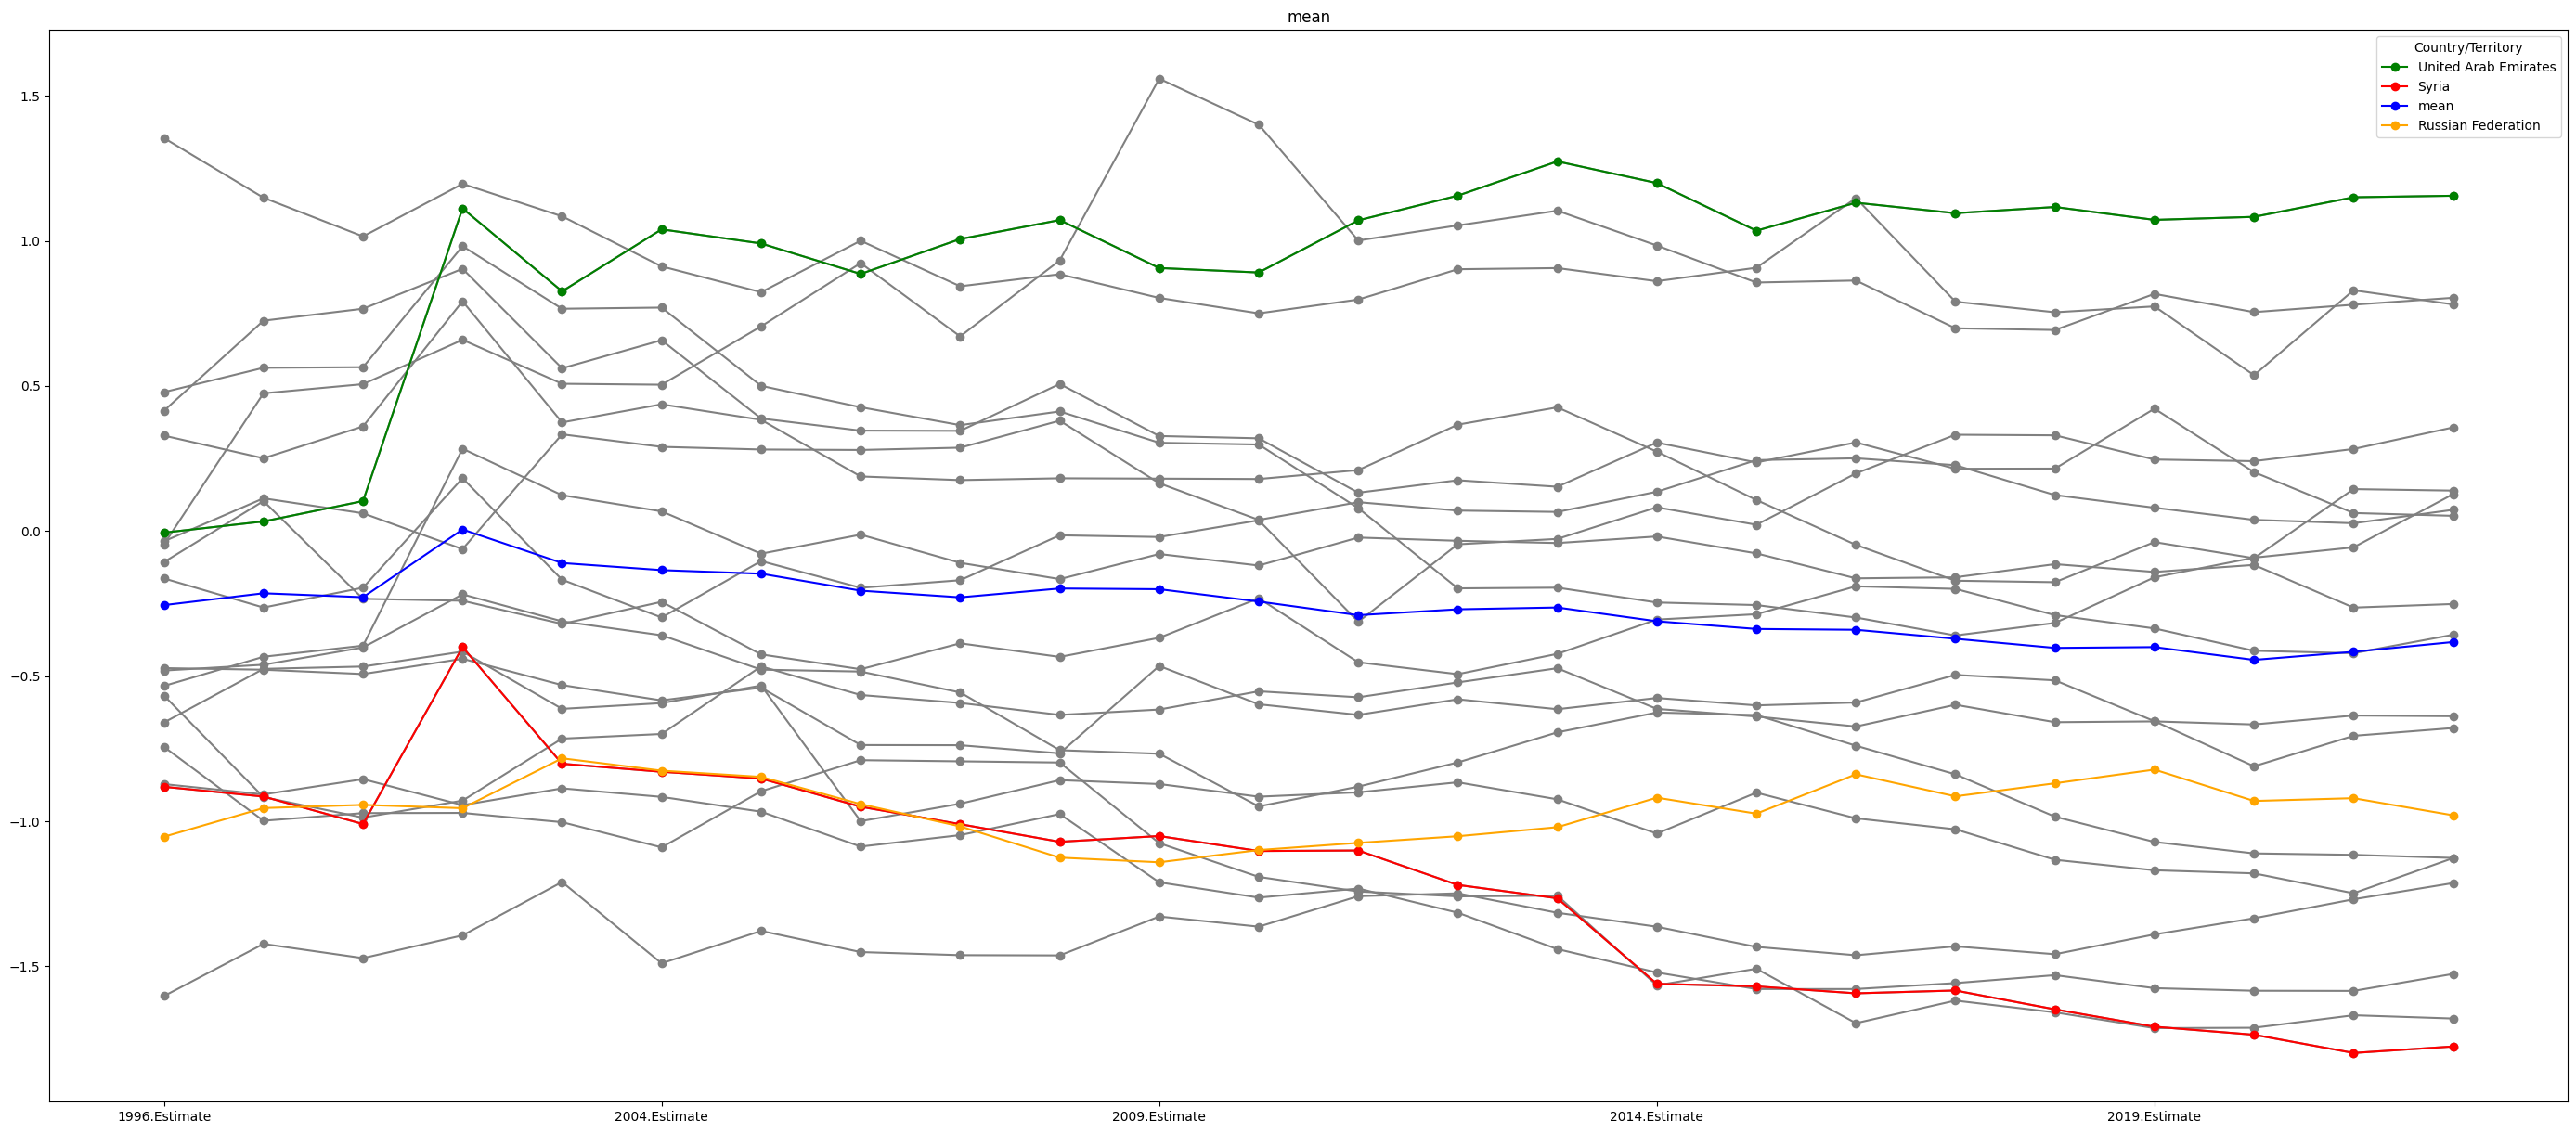

In [32]:
# Графики по всем странам
ax = df_plot_mena.T.plot(figsize=(35,15), grid=True, marker='o', title='WGI 1996-2022', color='grey', legend=False)
# Графики по странам с наибольшим и наименьшим значениями за 2022 год
df_plot_mena.loc[maxWgi].plot(color='green', marker = 'o', legend=True, ax = ax)
df_plot_mena.loc[minWgi].plot(color='red', marker = 'o', legend=True, ax = ax)
# График по среднему значению
mean.plot(title='mean', marker = 'o', color='blue', legend=True, ax = ax)
# Данные по России
df_wgi_russia = df[df['Code'] == 'RUS']
df_wgi_russia.set_index('Country/Territory', inplace=True)
df_wgi_russia = df_wgi_russia.filter(regex='Estimate')
# График по России
df_wgi_russia.T.plot(color='orange', marker = 'o', legend=True, ax = ax)

### 1.11 Определите, как изменилось значение показателя rank с 1996 по 2022
Вариант 2. Americas

In [33]:
# Страны региона AME
df_ame = df_region[df_region['Region'] == 'AME']
# WGI индексы для стран MENA
df_wgi_ame = df.merge(df_ame, how='inner', left_on='Code', right_on='Code')
# Создаем индекс, оставляем только поля Rank за 1996 и 2022
df_wgi_ame.set_index('Country', inplace=True)
df_wgi_ame = df_wgi_ame.filter(regex='1996.Rank|2022.Rank')
# Данные Rank по России
df_wgi_russia = df[df['Code'] == 'RUS']
df_wgi_russia.set_index('Country/Territory', inplace=True)
df_wgi_russia.rename_axis('Country', inplace=True)
df_wgi_russia = df_wgi_russia.filter(regex='1996.Rank|2022.Rank')
# Объединяем два датафрейма
df_wgi_ame_rus = pd.concat([df_wgi_ame, df_wgi_russia])
# Вывод промежуточного результата
df_wgi_ame_rus


,1996.Rank,2022.Rank
Country,,
Argentina,53.763439,36.320755
Bahamas,83.870964,84.433960
Bolivia,25.268818,20.754717
Brazil,56.989246,32.075470
Barbados,90.860214,89.150940
Canada,96.236557,93.396225
Chile,90.322578,80.660378
Colombia,36.559139,41.037735
Costa Rica,75.268814,66.981133


In [34]:
# Вычисляем изменение 2022 года относительного 1996
df_changes = df_wgi_ame_rus.pct_change(axis=1)
# Умножаем на 100 для получения процентов и добавляем к исходным данным
df_wgi_changes = df_wgi_ame_rus.copy()
df_wgi_changes['Change procent'] = (df_changes['2022.Rank'] * 100).round(2)
df_wgi_changes

/tmp/ipykernel_17077/4014822730.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_changes = df_wgi_ame_rus.pct_change(axis=1)


,1996.Rank,2022.Rank,Change procent
Country,,,
Argentina,53.763439,36.320755,-32.44
Bahamas,83.870964,84.433960,0.67
Bolivia,25.268818,20.754717,-17.86
Brazil,56.989246,32.075470,-43.72
Barbados,90.860214,89.150940,-1.88
Canada,96.236557,93.396225,-2.95
Chile,90.322578,80.660378,-10.70
Colombia,36.559139,41.037735,12.25
Costa Rica,75.268814,66.981133,-11.01


### 1.12 Выведите таблицу для Вашего варианта (WGI - rank)

In [35]:
# Создаем новый датафрейм для заполнения
rows = ['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'] # Список строк для нового датафрейма
cols = ['Регион', 'Страна', 'WGI 1996', 'WGI 2022', 'Изменение'] # Список столбцов для нового датафрейма
table = pd.DataFrame(index=rows,columns=cols)
# Заполняем первый столбец (Регион)
table.loc['mean_2022', 'Регион'] = "AME"
table.loc['max_2022', 'Регион'] = "AME"
table.loc['min_2022', 'Регион'] = "AME"
table.loc['Russia_2022', 'Регион'] = "ECA"
# Заполняем второй столбец (Страна)
minAmeIdx = df_wgi_ame['2022.Rank'].idxmin()
maxAmeIdx = df_wgi_ame['2022.Rank'].idxmax()
rusIdx = 'Russian Federation'
table.loc['mean_2022', 'Страна'] = "-"
table.loc['max_2022', 'Страна'] = maxAmeIdx
table.loc['min_2022', 'Страна'] = minAmeIdx
table.loc['Russia_2022', 'Страна'] = rusIdx
# Заполняем третий столбец (WGI 1996)
table.loc['mean_2022', 'WGI 1996'] = df_wgi_ame['1996.Rank'].mean()
table.loc['max_2022', 'WGI 1996'] = df_wgi_ame.loc[maxAmeIdx, '1996.Rank']
table.loc['min_2022', 'WGI 1996'] = df_wgi_ame.loc[minAmeIdx, '1996.Rank']
table.loc['Russia_2022', 'WGI 1996'] = df_wgi_ame_rus.loc[rusIdx, '1996.Rank']
# Заполняем четвертый столбец (WGI 2022)
table.loc['mean_2022', 'WGI 2022'] = df_wgi_ame['2022.Rank'].mean()
table.loc['max_2022', 'WGI 2022'] = df_wgi_ame.loc[maxAmeIdx, '2022.Rank']
table.loc['min_2022', 'WGI 2022'] = df_wgi_ame.loc[minAmeIdx, '2022.Rank']
table.loc['Russia_2022', 'WGI 2022'] = df_wgi_ame_rus.loc[rusIdx, '2022.Rank']
# Заполняем пятый столбец (Изменение)
# Для рассчета среднего изменения по региону из таблицы изменений удаляем Россию
df_wgi_changes_ame = df_wgi_changes.drop(rusIdx)
table.loc['mean_2022', 'Изменение'] = df_wgi_changes_ame['Change procent'].mean().round(2)
table.loc['max_2022', 'Изменение'] = df_wgi_changes_ame.loc[maxAmeIdx, 'Change procent']
table.loc['min_2022', 'Изменение'] = df_wgi_changes_ame.loc[minAmeIdx, 'Change procent']
table.loc['Russia_2022', 'Изменение'] = df_wgi_changes.loc[rusIdx, 'Change procent']
table


,Регион,Страна,WGI 1996,WGI 2022,Изменение
mean_2022,AME,-,53.27957,45.59257,-19.16
max_2022,AME,Canada,96.236557,93.396225,-2.95
min_2022,AME,Venezuela,22.580645,1.886792,-91.64
Russia_2022,ECA,Russian Federation,15.053763,19.339622,28.47


### 1.13 Отобразите диаграмму размаха индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике)

<Axes: >

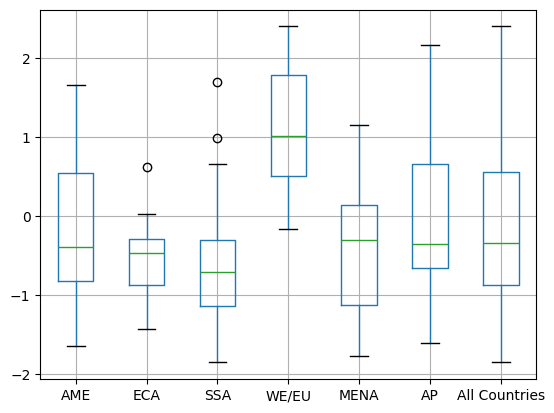

In [36]:
# Создаем датафрейм со всеми странами и объединяем с датафреймом с названием региона
df_merged = df.merge(df_region, how='inner', left_on='Code', right_on='Code')
# Оставляем только индекс Country, код региона и WGI за 2022 год
df_merged = df_merged.filter(regex='^Country$|2022.Estimate|Region')
df_merged.set_index('Country', inplace=True)
# Данные по каждому региону. Переименовываем столбец Estimate для отображения на общем графике
df_boxplot_ame = df_merged[df_merged['Region'] == 'AME'].rename(columns={'2022.Estimate':'AME'})
df_boxplot_eca = df_merged[df_merged['Region'] == 'ECA'].rename(columns={'2022.Estimate':'ECA'})
df_boxplot_ssa = df_merged[df_merged['Region'] == 'SSA'].rename(columns={'2022.Estimate':'SSA'})
df_boxplot_eu = df_merged[df_merged['Region'] == 'WE/EU'].rename(columns={'2022.Estimate':'WE/EU'})
df_boxplot_mena = df_merged[df_merged['Region'] == 'MENA'].rename(columns={'2022.Estimate':'MENA'})
df_boxplot_ap = df_merged[df_merged['Region'] == 'AP'].rename(columns={'2022.Estimate':'AP'})
# Данные по всем странам
df_boxplot_all = df_merged.rename(columns={'2022.Estimate':'All Countries'})
# Объединяем в общий датафрейм
df_boxplot = pd.concat([df_boxplot_ame, df_boxplot_eca, df_boxplot_ssa, df_boxplot_eu, df_boxplot_mena, df_boxplot_ap, df_boxplot_all], axis=1)
# Строим график
df_boxplot.boxplot()

## Задание 2. Анализ рынка акций
### 2.1 Загрузите данные в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv)

In [53]:
import glob
import pandas as pd

In [54]:
# Получение списка csv
files = glob.glob('./data/stock/*.csv')
# Загрузка данных по каждой компании в один датафрейм
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file, index_col='Date', usecols=['Date','Close'])
    compName = file.split('/')[-1].split('.')[0]
    df[compName] = data['Close']
df.head()

,TWLO,CSCO,DBX,AMZN,AAPL,SPOT,NVDA,NFLX,SHOP,ABNB,...,MSFT,TCOM,ORCL,INTC,GOOGL,TSLA,UBER,EBAY,ADBE,GTLB
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,206.119995,55.669998,24.750000,149.573502,174.779999,196.259995,244.860001,427.140015,NaN,153.970001,...,310.980011,26.610001,81.160004,48.820000,135.303497,312.239990,37.400002,60.070000,534.299988,64.010002
2022-02-01,174.800003,55.770000,22.690001,153.563004,165.119995,156.190002,243.850006,394.519989,NaN,151.490005,...,298.790009,25.820000,75.970001,47.700001,135.057007,290.143341,36.029999,54.590000,467.679993,58.270000
2022-03-01,164.809998,55.759998,23.250000,162.997498,174.610001,151.020004,272.859985,374.589996,NaN,171.759995,...,308.309998,23.120001,82.730003,49.560001,139.067505,359.200012,35.680000,57.259998,455.619995,54.450001
2022-04-01,111.820000,48.980000,21.750000,124.281502,157.649994,101.650002,185.470001,190.360001,NaN,153.210007,...,277.519989,23.650000,73.400002,43.590000,114.109497,290.253326,31.480000,51.919998,395.950012,47.930000
2022-05-01,105.169998,45.049999,20.840000,120.209503,148.839996,112.769997,186.720001,197.440002,NaN,120.870003,...,271.869995,22.059999,71.919998,44.419998,113.762001,252.753326,23.200001,48.669998,416.480011,38.939999


### 2.2 Рассчитайте корреляционную матрицу для всех акций

In [55]:
corr = df.corr()
corr

,TWLO,CSCO,DBX,AMZN,AAPL,SPOT,NVDA,NFLX,SHOP,ABNB,...,MSFT,TCOM,ORCL,INTC,GOOGL,TSLA,UBER,EBAY,ADBE,GTLB
TWLO,1.000000,0.383777,-0.113102,0.314869,0.042914,0.059969,-0.244797,-0.102302,0.657843,0.429915,...,-0.094023,-0.562073,-0.393536,0.585988,0.315410,0.703872,-0.186828,0.753732,0.067604,0.310273
CSCO,0.383777,1.000000,0.496982,0.404820,0.589552,0.424007,0.320159,0.497727,-0.144612,0.594365,...,0.391476,0.257188,0.463955,0.420854,0.600025,0.253808,0.326346,0.494938,0.554172,0.068856
DBX,-0.113102,0.496982,1.000000,0.478171,0.740429,0.525305,0.519374,0.635239,0.424923,0.332740,...,0.648164,0.423136,0.667833,0.390625,0.669228,0.037233,0.595928,-0.157363,0.816359,0.402517
AMZN,0.314869,0.404820,0.478171,1.000000,0.665715,0.875779,0.765294,0.735466,0.824934,0.830690,...,0.838702,0.309545,0.534556,0.816519,0.912332,0.302321,0.796897,0.434078,0.819614,0.690644
AAPL,0.042914,0.589552,0.740429,0.665715,1.000000,0.687415,0.633114,0.701937,0.465147,0.617430,...,0.790691,0.439363,0.769309,0.507251,0.806847,0.248385,0.661323,0.115591,0.833129,0.282373
SPOT,0.059969,0.424007,0.525305,0.875779,0.687415,1.000000,0.925270,0.920771,0.737909,0.753797,...,0.949380,0.640120,0.763100,0.645555,0.821587,-0.092332,0.933308,0.296858,0.863827,0.540113
NVDA,-0.244797,0.320159,0.519374,0.765294,0.633114,0.925270,1.000000,0.910910,0.713391,0.649664,...,0.935386,0.787859,0.875089,0.458281,0.715287,-0.277600,0.969790,0.087027,0.802739,0.404702
NFLX,-0.102302,0.497727,0.635239,0.735466,0.701937,0.920771,0.910910,1.000000,0.852517,0.646901,...,0.900263,0.766681,0.859397,0.447049,0.717756,-0.251616,0.937042,0.138580,0.821314,0.452625
SHOP,0.657843,-0.144612,0.424923,0.824934,0.465147,0.737909,0.713391,0.852517,1.000000,0.696599,...,0.842193,0.592950,0.635736,0.809582,0.824313,0.025575,0.836565,0.338672,0.783919,0.855342
ABNB,0.429915,0.594365,0.332740,0.830690,0.617430,0.753797,0.649664,0.646901,0.696599,1.000000,...,0.679204,0.294269,0.471504,0.738241,0.780440,0.353807,0.680764,0.644140,0.670509,0.460602


### 2.3 Отобразите корреляционную матрицу в виде диаграммы

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

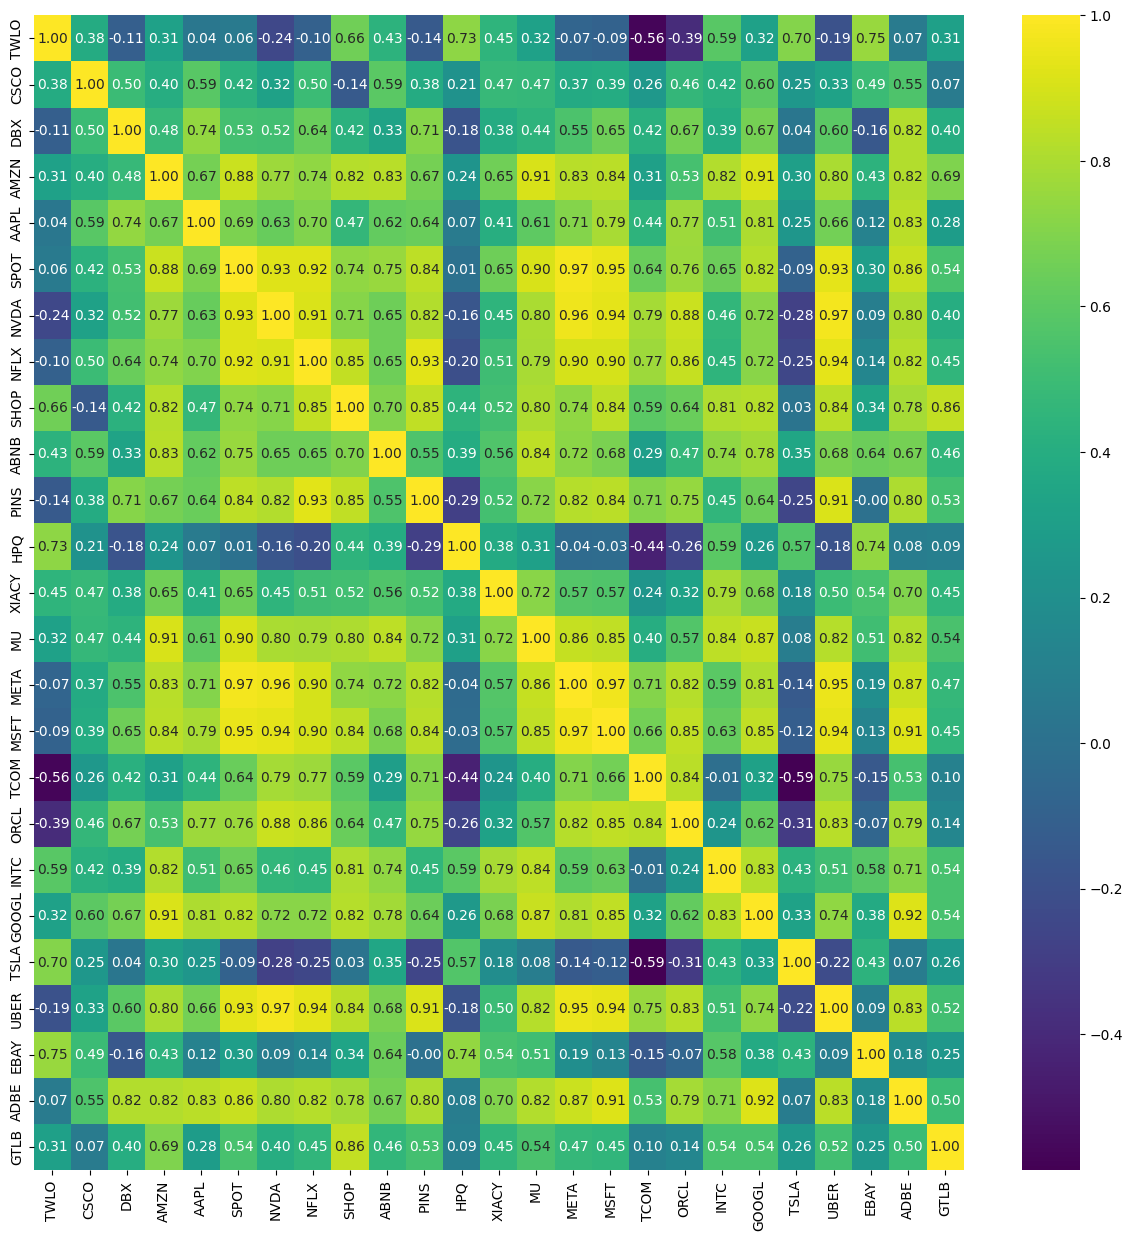

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.show()

### 2.4 В соответствии с Вашим вариантом определите:
- акцию с максимальной положительной корреляцией (max)
- акцию с максимальной отрицательной корреляцией (min)
- акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

Вариант 4. Uber (UBER)

In [58]:
# Корелляция акций UBER с другими акциями
uber_corr = corr['UBER']
uber_corr = uber_corr.drop('UBER')
uber_corr

TWLO    -0.186828
CSCO     0.326346
DBX      0.595928
AMZN     0.796897
AAPL     0.661323
SPOT     0.933308
NVDA     0.969790
NFLX     0.937042
SHOP     0.836565
ABNB     0.680764
PINS     0.907751
HPQ     -0.180970
XIACY    0.495835
MU       0.820809
META     0.954444
MSFT     0.939538
TCOM     0.754442
ORCL     0.832075
INTC     0.512572
GOOGL    0.737311
TSLA    -0.221155
EBAY     0.085736
ADBE     0.834611
GTLB     0.521399
Name: UBER, dtype: float64

In [52]:
# Акция с максимальной положительная корреляция
max_corr = uber_corr.idxmax()
max_corr

'NVDA'

In [59]:
# Акция с максимальной отрицательная корреляция
min_corr = uber_corr.idxmin()
min_corr

'TSLA'

In [70]:
# Акция с минимальной корреляцией
none_corr = uber_corr.abs().idxmin()
none_corr

'EBAY'

### 2.5 Постройте диаграммы разброса
- Ваша компания - Компания с min 
- Ваша компания - Компания с max 
- Ваша компания - Компания с none

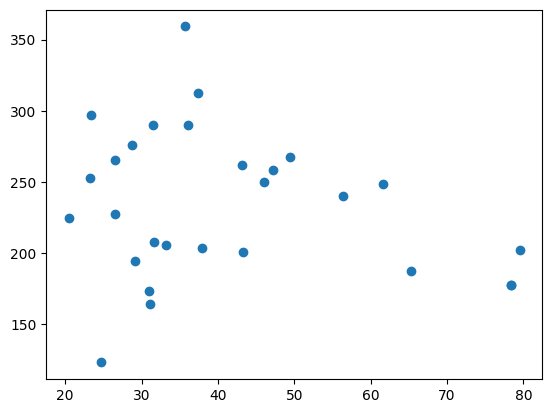

In [66]:
# Диаграмма разброса UBER - min corr
plt.scatter(df['UBER'], df[min_corr])

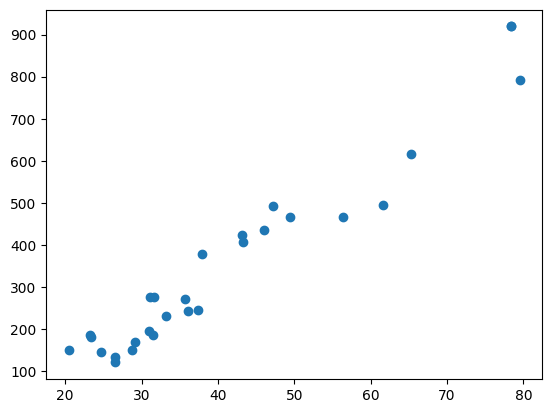

In [67]:
# Диаграмма разброса UBER - max corr
plt.scatter(df['UBER'], df[max_corr])

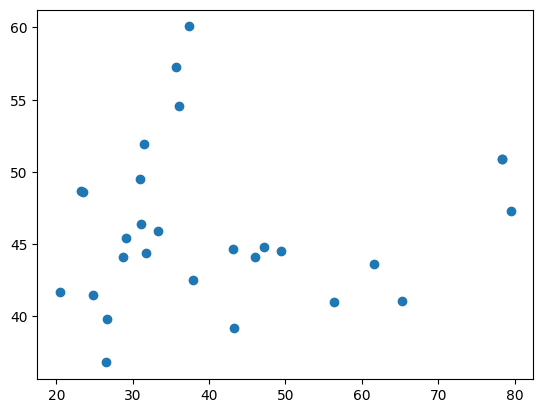

In [71]:
# Диаграмма разброса UBER - none corr
plt.scatter(df['UBER'], df[none_corr])

### 2.6 Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [74]:
# Транспонируем исходный датафрейм, чтобы каждый месяц был столбцом, по которому рассчитается среднее
mean = df.T.mean()
mean.name='mean'
mean

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
Name: mean, dtype: float64

### 2.7 Постройте графики для акций из пункта 4 и средней из пункта 6

<Axes: xlabel='Date'>

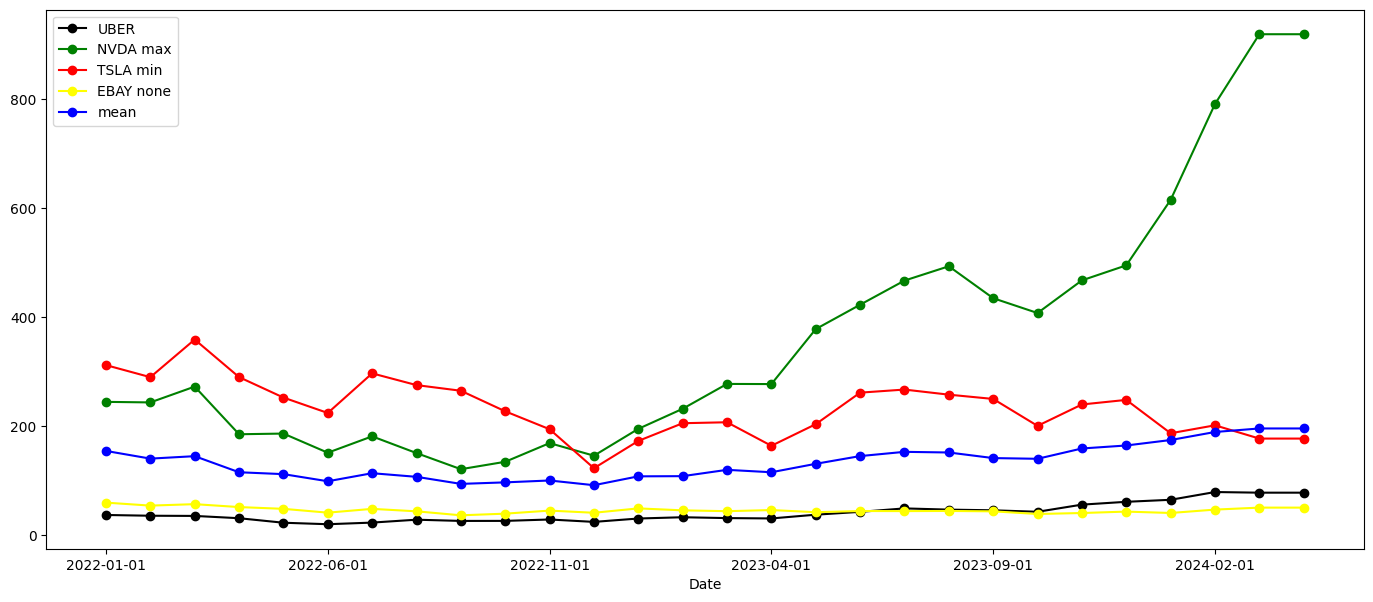

In [91]:
df['UBER'].plot(figsize=(17,7), marker='o', color='black', legend=True)
df[max_corr].plot(label=max_corr + ' max', marker='o', color='green', legend=True)
df[min_corr].plot(label=min_corr + ' min', marker='o', color='red', legend=True)
df[none_corr].plot(label=none_corr + ' none', marker='o', color='yellow', legend=True)
mean.plot(marker='o', color='blue', legend=True)

## Вывод
В данном домашнее задании были отработаны с использованием языка Python такие навыки и умения, как:
- Решение практических задач по анализу данных
- Загрузка, трансформация, вычисление простых статистик
- Визуализация данных в виде графиков и диаграмм